# "Chill Havana" Project
### Análisis de Bares y Restaurantes en La Habana

Un día como cualquier otro salía un grupo de jóvenes de su escuela tras haber terminado los parciales con ganas de pasar un ratico chill con los colegas, con algo para picar y una musiquita de fondo fuera de la monotonía de sus casas. Ya todos habían dado el sí cuando alguien soltó la misma pregunta de siempre: Loco, pero a dónde vamos? Nada, que esa era la pregunta que casi siemmpre cortaba todo el rollo. Buscar el sitio ideal para las vibes del momento era bastante complicado, en ningún sitio ponían toda la info necearia. "Tu busca en MenúCuba, ella en Instagram y yo la dirección en Maps, y ojala salga todo!"

Nunca has sentido tremendo agobio de escoger a que lugar salir? Pues aquellos jovenes si y decidieron que era la ultima vez. Que es lo mas importante para a la hora de elegir? La variedad del menu o un plato especifico? La ubicacion? La valoracion de otras personas? 
Nada, que tu puedes elegir lo que quieras porque para eso aquella tarde nacio el proyecto "Chill Havana".

Tanto lio y al final ese dia no salieron, se quedaron pensando y organizando sus ideas. Si si, ellos se tomaron el problema como algo personal, pero tranqui, tenian su arma secreta: Jorge, el amiguito del grupo que le metia al HTML. Estaba clarisimo, querian hacer una pagina web que recopilara datos sobre mas de 200 bares y restaurantes de La Habana para que cualquiera que quisiera elegir un lugar pudiera encontrar alli todo lo necesario para decidirse por el mas adecuado para la ocasion.
Oye que el proyecto era tremenda idea eh, como crees que cambiaria tu experiencia al salir a comer tener un sitio web tan duro?

Despues de meses de arduo trabajo (en serio fue tremenda pincha) el grupito decidio analizar sus hallazgos.

In [1]:
#Crear el dataframe con los json para el trabajo con las bibliotecas de Python
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import folium
import plotly.express as px

def crear_data_frame():
    ruta = "C:/Users/andre/Desktop/Chill_Havana_Project/Jsons"
    data = []
    for archivo in glob.glob(ruta + "/*.json"):
        with open(archivo, 'r', encoding='utf-8') as f:
            contenido = json.load(f)
            data.append(contenido)
            
    df = pd.DataFrame(data)
    return df

df = crear_data_frame()
print(df)

    type_of_establishment              name                district  \
0             restaurante          28 y Mar                   Playa   
1             restaurante              2KFÉ                   Regla   
2       bar - restaurante        5ta Billar                   Regla   
3             restaurante     A&J Fast Food                Marianao   
4             restaurante      Abuelo D'Oro                 Boyeros   
..                    ...               ...                     ...   
193           restaurante    Cafe Versalles              Guanabacoa   
194     bar - restaurante         Villarino                   Playa   
195     bar - restaurante        Vita Nuova  Plaza de la Revolución   
196           restaurante              Wapa  Plaza de la Revolución   
197     bar - restaurante  Yesterday Havana   San Miguel del Padrón   

                                           coordinates  \
0    {'latitude': 23.12361712886297, 'longitude': -...   
1    {'latitude': 23.1280587447

El grupo selecciono tres municipios cabacera por ser los mas frecuentados por ellos, de estos tres municipios analizaron 30 establecimientos, y del resto solo 10. Todos estos fueron clasificados en "bar", "restaurante" o "bar - restaurante"

In [2]:
# Contar los tipos de establecimientos
tipo_establecimientos = df['type_of_establishment'].value_counts().reset_index()
tipo_establecimientos.columns = ['Tipo de Establecimiento', 'Cantidad']

fig = px.pie(tipo_establecimientos, 
            values='Cantidad', 
            names='Tipo de Establecimiento', 
            title='Porcentaje de Tipos de Establecimientos en La Habana',
            hole=0.1)
fig.show()

In [3]:
# Crear un mapa con todos los establecimientos
mapa = folium.Map(location=[23.1136, -82.3666], zoom_start=12)  # Coordenadas de La Habana

for index, row in df.iterrows():
    latitude = row['coordinates']['latitude']
    longitude = row['coordinates']['longitude']
    name = row['name']
    
    folium.Marker(
        location=[latitude, longitude],
        popup=name,
        icon=folium.Icon(color='darkpurple')
    ).add_to(mapa)

mapa

Uno de los aspectos que consideraron de mayor importancia, principalmente para los mas jovenes, fue el analisis sobre cuantos establecimientos de los estudiados poseia redes sociales como Instagran y Facebook que, por lo general influye en la popularidad del mismo.

In [4]:
#Ver la cantidad de establecimientos por municipio que tiene Instagram y Facebook.
def social_networks(contact):
    return bool(contact.get('instagram')) and bool(contact.get('facebook'))

df['has_social_net'] = df['contact'].apply(social_networks)

df_social_net = df[df['has_social_net']]

mun_count = df_social_net['district'].value_counts().reset_index()
mun_count.columns = ['Municipio', 'Cantidad']

fig = px.bar(mun_count, 
            x='Municipio', 
            y='Cantidad', 
            title='Cantidad de Restaurantes con Redes Sociales por Municipio',
            labels={'Cantidad': 'Cantidad de Restaurantes', 'Municipio': 'Municipio'},
            color='Cantidad',
            color_continuous_scale=px.colors.sequential.Purples)  # Cambiado a 'Greens'

fig.update_layout(xaxis_tickangle=-45)  # Rotar las etiquetas del eje x
fig.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_11828\2627492238.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.



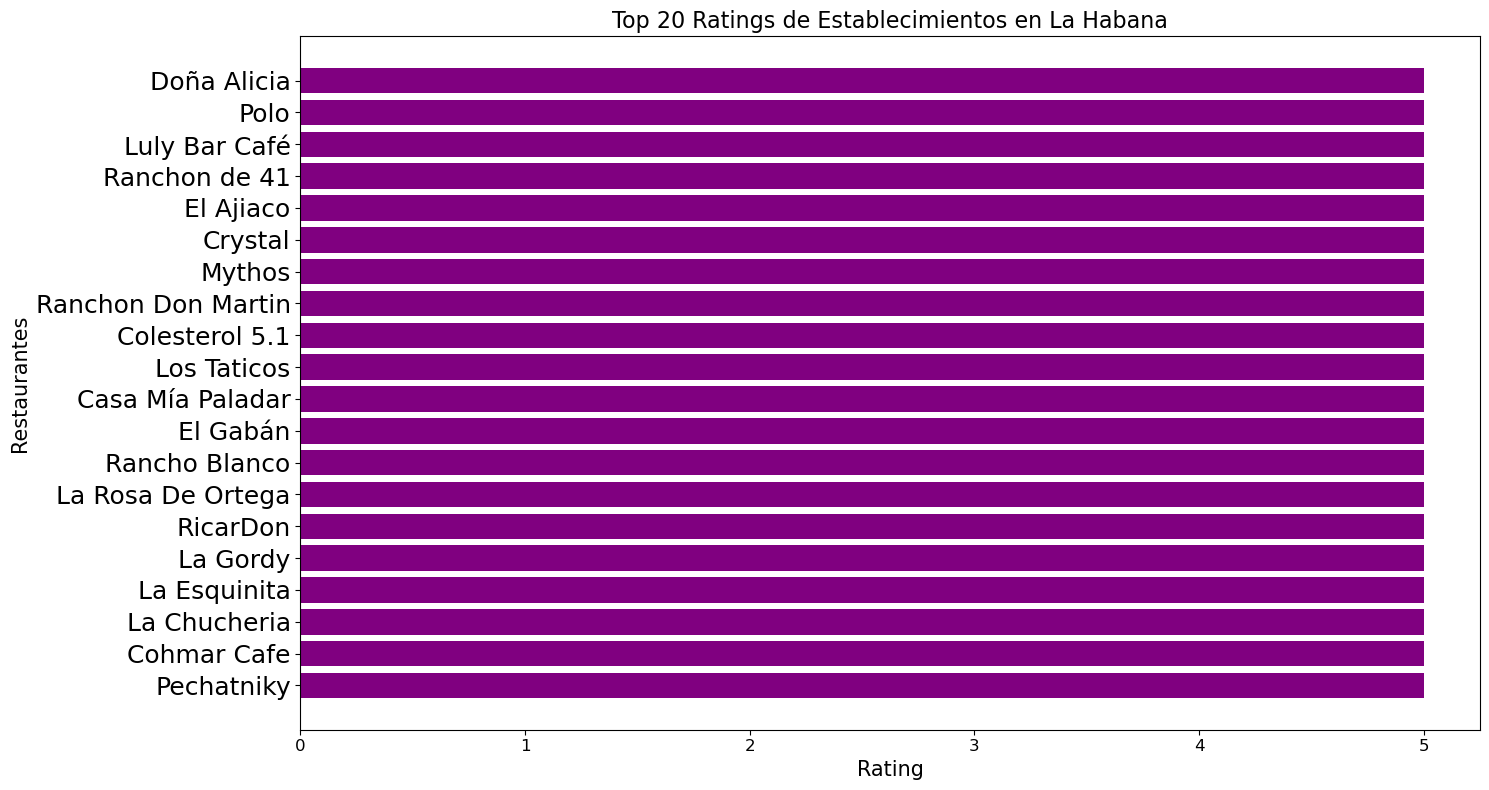

In [5]:
df[df["rating"].isna()]=0
df_valid_ratings = df.sort_values(by='rating', ascending=False).head(20)  # Mostrar solo los 20 mejores

plt.figure(figsize=(15, 8))
plt.barh(df_valid_ratings['name'], df_valid_ratings['rating'], color='purple')
plt.title('Top 20 Ratings de Establecimientos en La Habana', fontsize=16)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Restaurantes', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

    type_of_establishment                  name                district  \
196           restaurante                  Wapa  Plaza de la Revolución   
104           restaurante         Joe's Burguer         Diez de Octubre   
6             restaurante          Al Campestre         Habana del Este   
85            restaurante          Fénix Dorado           Centro Habana   
134     bar - restaurante  La ruta de Hemingway         Habana del Este   
68      bar - restaurante              El Bleko           Centro Habana   
24      bar - restaurante          Cafe Bulevar           Centro Habana   
151           restaurante               Mokalex                   Playa   
94            restaurante            Guang Zhou           Centro Habana   
51            restaurante          Doping pizza           Centro Habana   
130           restaurante              La Novia                 La Lisa   
180     bar - restaurante            Shapuseros                   Cerro   
176     bar - restaurante

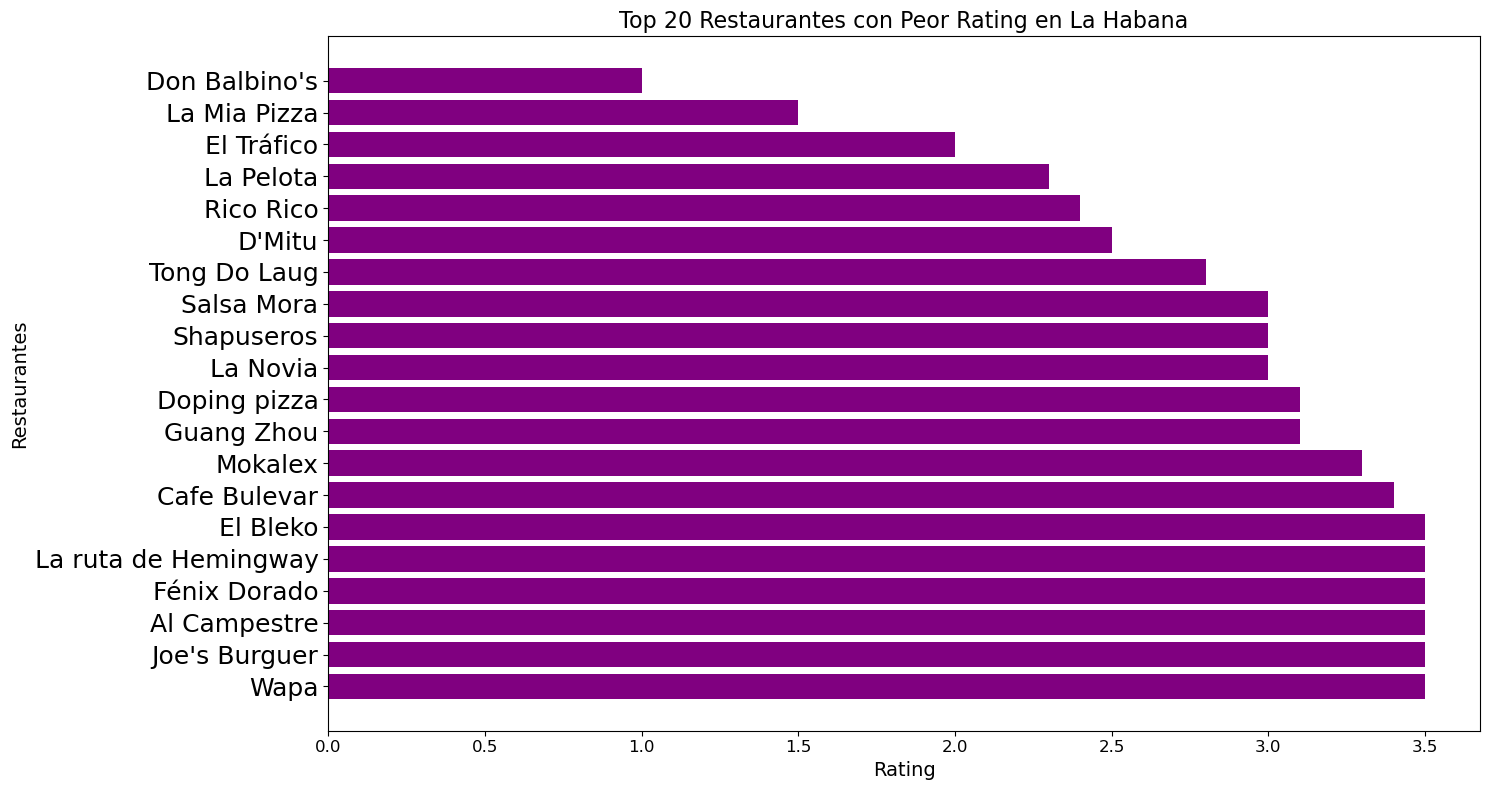

In [6]:
df_sorted_values = df.sort_values(by='rating', ascending=False).tail(51) 
veinte_peores = df_sorted_values.iloc[:20,:]
print(veinte_peores)

plt.figure(figsize=(15, 8)) 
plt.barh(veinte_peores['name'], veinte_peores['rating'], color='purple')
plt.title('Top 20 Restaurantes con Peor Rating en La Habana', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Restaurantes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=18)
plt.tight_layout() 
plt.show()